<img align="right" src = "https://raw.githubusercontent.com/arsilva87/statsbook/main/figs/figura_thumbnail.png" width="25%" height="25%">

Códigos em R do livro: **Estatística Decodificada** (Silva, A.R. 2021) 

Capítulo 19: **Modelos lineares generalizados**
____

**Ajuste**

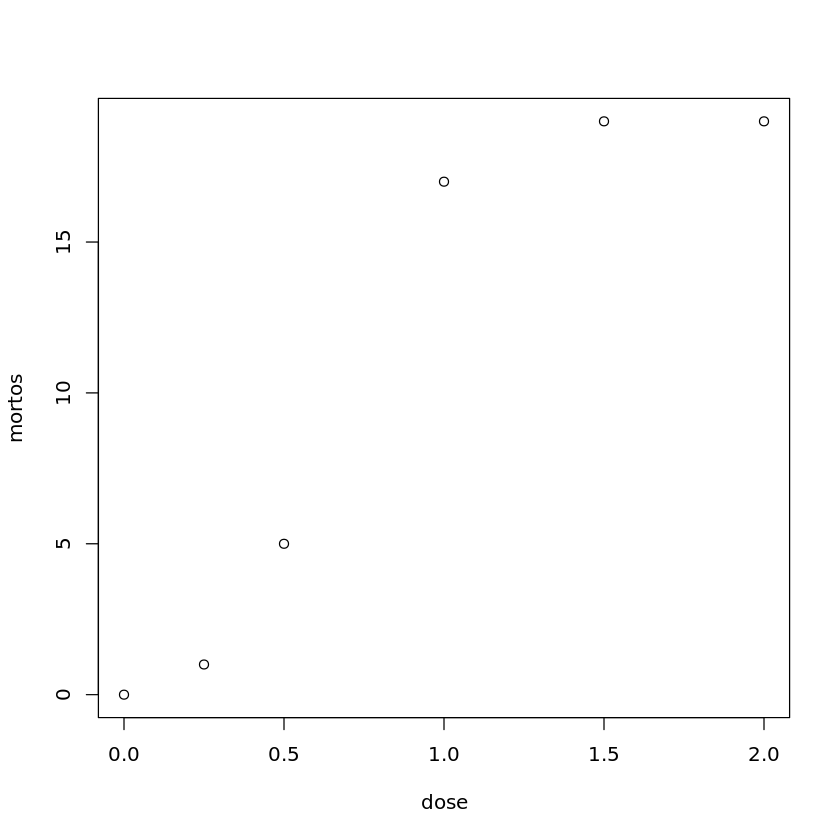

In [1]:
# dados de exemplo
dose <- c(0, 0.25, 0.5, 1, 1.5, 2)
mortos <- c(0, 1, 5, 17, 19, 19)
vivos <- 20 - mortos
plot(mortos ~ dose)

In [2]:
# ajuste do MLG binomial
glm.mortos <- glm(cbind(mortos, vivos) ~ dose, family = binomial(link = "logit"))
glm.mortos


Call:  glm(formula = cbind(mortos, vivos) ~ dose, family = binomial(link = "logit"))

Coefficients:
(Intercept)         dose  
     -3.428        4.461  

Degrees of Freedom: 5 Total (i.e. Null);  4 Residual
Null Deviance:	    103.1 
Residual Deviance: 6.543 	AIC: 22.42

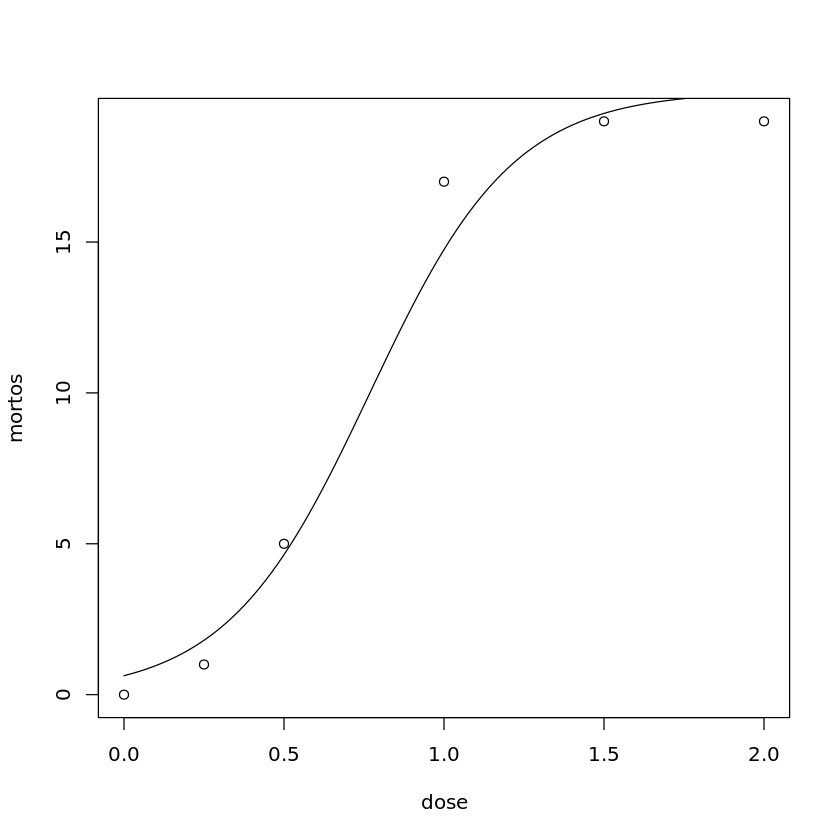

In [3]:
# curva logit
plot(mortos ~ dose)
curve(20 * exp(-3.428 + 4.461*x)/(1 + exp(-3.428 + 4.461*x)), add = TRUE)

____
**Inferência**

In [4]:
# teste z
summary(glm.mortos)


Call:
glm(formula = cbind(mortos, vivos) ~ dose, family = binomial(link = "logit"))

Deviance Residuals: 
      1        2        3        4        5        6  
-1.1304  -0.6788   0.1897   1.2123  -0.2964  -1.7918  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -3.4277     0.6150  -5.573 2.50e-08 ***
dose          4.4606     0.7639   5.839 5.25e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 103.0984  on 5  degrees of freedom
Residual deviance:   6.5429  on 4  degrees of freedom
AIC: 22.417

Number of Fisher Scoring iterations: 5


In [5]:
# análise de deviance
anova(glm.mortos, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,5,103.098390,NA
dose,1,96.55548,4,6.542909,8.677774e-23


___
**Exemplo de aplicação**

In [20]:
daninhas <- data.frame(herbicida = c('C', 'C', 'G', 'G', 'H', 'H'), 
                      parc = rep(1:2, 3),
                      nplantas = c(139, 161, 130, 97, 180, 140))
daninhas

herbicida,parc,nplantas
<fct>,<int>,<dbl>
C,1,139
C,2,161
G,1,130
G,2,97
H,1,180
H,2,140


In [21]:
# ajuste do MLG Poisson com função de ligação log
glm.daninhas <- glm(nplantas ~ herbicida, data = daninhas, family = poisson(link = "log"))
summary(glm.daninhas)


Call:
glm(formula = nplantas ~ herbicida, family = poisson(link = "log"), 
    data = daninhas)

Deviance Residuals: 
      1        2        3        4        5        6  
-0.9095   0.8875   1.5133  -1.5888   1.5498  -1.6159  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.01064    0.05774  86.787  < 2e-16 ***
herbicidaG  -0.27883    0.08797  -3.170  0.00153 ** 
herbicidaH   0.06454    0.08036   0.803  0.42193    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 28.973  on 5  degrees of freedom
Residual deviance: 11.442  on 3  degrees of freedom
AIC: 58.07

Number of Fisher Scoring iterations: 4


In [22]:
# ANODEV
anova(glm.daninhas, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,5,28.97275,NA
herbicida,2,17.53047,3,11.44228,0.0001560654


In [24]:
# teste do contraste entre herbicidas C vs G
library(multcomp)
c1 <- glht(glm.daninhas, linfct = mcp(herbicida = c(1, -1, 0)))
summary(c1)

Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser





	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: glm(formula = nplantas ~ herbicida, family = poisson(link = "log"), 
    data = daninhas)

Linear Hypotheses:
       Estimate Std. Error z value Pr(>|z|)   
1 == 0  0.27883    0.08797    3.17  0.00153 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [25]:
# todas as comparações de médias aos pares
todos <- glht(glm.daninhas, linfct = mcp(herbicida = "Tukey"))
summary(todos)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: glm(formula = nplantas ~ herbicida, family = poisson(link = "log"), 
    data = daninhas)

Linear Hypotheses:
           Estimate Std. Error z value Pr(>|z|)    
G - C == 0 -0.27883    0.08797  -3.170  0.00427 ** 
H - C == 0  0.06454    0.08036   0.803  0.70078    
H - G == 0  0.34337    0.08678   3.957  < 0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


_____
**Superdispersão**

*MLG binomial negativo*

In [26]:
# estatística X2 de Pearson para avaliação de superdispersão
rP = residuals(glm.daninhas, type = "pearson")
X2 = sum(rP^2)
X2
1 - pchisq(X2, df = glm.daninhas$df.residual)     # p-valor

[1] 11.41069

[1] 0.009700303

In [27]:
# ajuste do MLG binomial negativo
library(MASS)
nb.glm.daninhas <- glm.nb(nplantas ~ herbicida, data = daninhas)
summary(nb.glm.daninhas)


Call:
glm.nb(formula = nplantas ~ herbicida, data = daninhas, init.theta = 156.3410513, 
    link = log)

Deviance Residuals: 
      1        2        3        4        5        6  
-0.6537   0.6303   1.1407  -1.2223   1.0785  -1.1486  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.01064    0.08082  61.999   <2e-16 ***
herbicidaG  -0.27883    0.11889  -2.345    0.019 *  
herbicidaH   0.06454    0.11338   0.569    0.569    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(156.3411) family taken to be 1)

    Null deviance: 15.4647  on 5  degrees of freedom
Residual deviance:  6.1024  on 3  degrees of freedom
AIC: 58.57

Number of Fisher Scoring iterations: 1


              Theta:  156 
          Std. Err.:  194 

 2 x log-likelihood:  -50.57 

In [28]:
# ANODEV
anova(nb.glm.daninhas, test = "Chisq")

Warning message in anova.negbin(nb.glm.daninhas, test = "Chisq"):
“tests made without re-estimating 'theta'”


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,5,15.464735,NA
herbicida,2,9.362307,3,6.102428,0.009268317


*Modelo ZIP: Zero Inflated Poisson*

In [29]:
# dados de exemplo (DBC)
y = c(0, 0, 1, 8,  0, 1, 0, 4,  1, 1, 0, 0,  0, 0, 0, 9)
Bloco = gl(4, 4)
Trat = factor(rep(LETTERS[1:4], 4))

In [31]:
library(pscl)
zip.tomate = zeroinfl(y ~ Trat + Bloco|1, dist = "poisson")
summary(zip.tomate)

Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis




Call:
zeroinfl(formula = y ~ Trat + Bloco | 1, dist = "poisson")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.8895 -0.4884 -0.3303  0.3627  1.6814 

Count model coefficients (poisson with log link):
             Estimate Std. Error z value Pr(>|z|)   
(Intercept) -1.454179   1.196541  -1.215  0.22424   
TratB        0.687329   1.242342   0.553  0.58009   
TratC        0.103501   1.465081   0.071  0.94368   
TratD        3.559646   1.187756   2.997  0.00273 **
Bloco2      -0.595624   0.558824  -1.066  0.28649   
Bloco3       0.815244   1.073710   0.759  0.44769   
Bloco4       0.006326   0.473017   0.013  0.98933   

Zero-inflation model coefficients (binomial with logit link):
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   -1.539      1.086  -1.417    0.156
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Number of iterations in BFGS optimization: 65 
Log-likelihood: -16.18 on 8 Df

In [32]:
# TRV para efeito de tratamento
zip0 = zeroinfl(y ~ Bloco|1, dist = "poisson")   # modelo sem efeito de Trat
logLik(zip0)                                     # log-verossimilhança do modelo sem Trat
logLik(zip.tomate)                               # log-verossimilhança do modelo com Trat

'log Lik.' -23.8823 (df=5)

'log Lik.' -16.17977 (df=8)

In [33]:
LR = 2*(-16.17977 - (-23.8823))   # estatística do TRV
1 - pchisq(LR, df = 8 - 5)        # p-valor

[1] 0.001501264

In [34]:
# X2 de Pearson e p-valor
X2.zip = sum(residuals(zip.tomate, type = "pearson")^2)
1 - pchisq(X2.zip, df = zip.tomate$df.residual)

[1] 0.1427105

*Modelo ZINB: Zero Iinflated Negative Binomial*

In [35]:
zinb.tomate = zeroinfl(y ~ Trat + Bloco|1, dist = "negbin")
summary(zinb.tomate)


Call:
zeroinfl(formula = y ~ Trat + Bloco | 1, dist = "negbin")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.8895 -0.4884 -0.3303  0.3627  1.6814 

Count model coefficients (negbin with log link):
              Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -1.454180   1.196540  -1.215  0.22424   
TratB         0.687322   1.242342   0.553  0.58009   
TratC         0.103509   1.465078   0.071  0.94368   
TratD         3.559650   1.187756   2.997  0.00273 **
Bloco2       -0.595624   0.558825  -1.066  0.28649   
Bloco3        0.815250   1.073710   0.759  0.44768   
Bloco4        0.006326   0.473018   0.013  0.98933   
Log(theta)   14.048290 305.702736   0.046  0.96335   

Zero-inflation model coefficients (binomial with logit link):
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   -1.539      1.086  -1.417    0.156
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Theta = 1262102.8495 
Number of iterations in BFGS optimization: 40

In [36]:
# comparação dos AIC dos modelos
AIC(zip.tomate, zinb.tomate)

,df,AIC
,<dbl>,<dbl>
zip.tomate,8,48.35955
zinb.tomate,9,50.35956


*Modelos de quasi-verossimilhança*

In [38]:
# matriz do modelo do exemplo de aplicação (daninhas)
X <- model.matrix(nplantas ~ herbicida, data = daninhas)
X

,(Intercept),herbicidaG,herbicidaH
1,1,0,0
2,1,0,0
3,1,1,0
4,1,1,0
5,1,0,1
6,1,0,1


In [39]:
# vetor de respostas
y <- daninhas$nplantas             

# função de quasi-verossimihança
minusQL <- function(betas) {
    mu <- exp( X %*% betas )
    Q <- y*(log(mu/y) + 1) - mu
    -sum(Q)
}

# obtenção das estimativas de máxima quasi-verossimilhança
QML <- optim(par = c(beta0 = 3, G = 0.1, H = 0.1), fn = minusQL, hessian = TRUE)
QML

,beta0,G,H
beta0,847.0777,227.0556,320.0404
G,227.0556,227.0556,0.0000
H,320.0404,0.0000,320.0404


In [40]:
# estimação do parâmetro phi de dispersão
betas <- QML$par
mu <- exp(X %*% betas)
rP <- (y - mu)/sqrt(mu)  # resíduos de Pearson
phi <- sum(rP^2)/3       # phi = X2/(n - p)
phi

[1] 3.803002

In [41]:
# estimativa da matriz de covariâncias dos betas sem levar em conta phi
solve(QML$hessian)

,beta0,G,H
beta0,0.003333538,-0.003333538,-0.003333538
G,-0.003333538,0.007737745,0.003333538
H,-0.003333538,0.003333538,0.006458143


In [42]:
# ... conferindo com o modelo ajustado
vcov(glm.daninhas)

,(Intercept),herbicidaG,herbicidaH
(Intercept),0.003333333,-0.003333333,-0.003333333
herbicidaG,-0.003333333,0.007738620,0.003333333
herbicidaH,-0.003333333,0.003333333,0.006458333


In [44]:
# obtenção da matriz de covariâncias levando em conta phi (abordagem correta)
solve(QML$hessian) * phi

,beta0,G,H
beta0,0.01267745,-0.01267745,-0.01267745
G,-0.01267745,0.02942666,0.01267745
H,-0.01267745,0.01267745,0.02456033


Estimação por QV considerando a função de variância $V(\mu) = \mu^2$

In [45]:
# computando a função de quasi-verossimilhança
minusQL <- function(betas) {
    mu <- exp( X %*% betas )
    Q <- log(y/mu) - y/mu + 1
    -sum(Q)
}

# computando as estimativas beta de QV
QML <- optim(par = c(beta0 = 3, G = 0.1, H = 0.1), 
    fn = minusQL, hessian = TRUE)
betas <- QML$par
betas

beta0           G           H 
 5.01040576 -0.27842758  0.06452502

In [46]:
# estimando o parâmetro phi
mu <- exp(X %*% betas)
rP <- (y - mu)/sqrt(mu^2)    # resíduos de Pearson
phi <- sum(rP^2)/3           # phi = X2/(n - p)
phi

[1] 0.02809287

In [47]:
# matriz de covariâncias dos betas
solve(QML$hessian) * phi 

,beta0,G,H
beta0,0.01404321,-0.01404321,-0.01404321
G,-0.01404321,0.02809210,0.01404321
H,-0.01404321,0.01404321,0.02808622


In [48]:
# agora usando a implementação do R
quasi.daninhas <- update(glm.daninhas, family = quasi(link = "log", variance = "mu^2"))
summary(quasi.daninhas)


Call:
glm(formula = nplantas ~ herbicida, family = quasi(link = "log", 
    variance = "mu^2"), data = daninhas)

Deviance Residuals: 
       1         2         3         4         5         6  
-0.07521   0.07161   0.13887  -0.15308   0.12014  -0.13062  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.01064    0.11851  42.279 2.91e-05 ***
herbicidaG  -0.27883    0.16760  -1.664    0.195    
herbicidaH   0.06454    0.16760   0.385    0.726    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasi family taken to be 0.02809101)

    Null deviance: 0.213849  on 5  degrees of freedom
Residual deviance: 0.085002  on 3  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 4


____
**Os MLG e a heterocedasticidade**

In [50]:
# médias (m), variâncias (v), erros padrão (se) e razão variância/média dos dados 'daninhas'
mvs <- function(x) c(m = mean(x), v = var(x), se = sqrt(var(x)/length(x)), rmv = mean(x)/var(x))
print(aggregate(nplantas ~ herbicida, data = daninhas, FUN = mvs))

  herbicida  nplantas.m  nplantas.v nplantas.se nplantas.rmv
1         C 150.0000000 242.0000000  11.0000000    0.6198347
2         G 113.5000000 544.5000000  16.5000000    0.2084481
3         H 160.0000000 800.0000000  20.0000000    0.2000000


In [52]:
# observando os erros padrão das médias dos herbicidas
library(emmeans)
lsmeans(glm.daninhas, specs = "herbicida", type = "response")

 herbicida rate   SE  df asymp.LCL asymp.UCL
 C          150 8.66 Inf     134.0       168
 G          114 7.53 Inf      99.7       129
 H          160 8.94 Inf     143.4       179

Confidence level used: 0.95 
Intervals are back-transformed from the log scale 